In [ ]:
import pandas as pd
df=pd.read_csv("../data/raw/bengaluru_house_prices.csv")

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df1=df.dropna()

In [ ]:
df1.describe()

,bath,balcony,price
count,7496.000000,7496.000000,7496.000000
mean,2.458378,1.629936,96.857122
std,0.881128,0.780127,105.382490
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.500000
50%,2.000000,2.000000,69.755000
75%,3.000000,2.000000,105.000000
max,9.000000,3.000000,2700.000000


In [ ]:
def is_float(X):
    arr=X.split("-")
    if len(arr)==2:
        return (float(arr[0])+float(arr[1]))/2
    try :
        return float(X)
    except:
        return None


In [ ]:
df2=df1.copy()
df2["total_sqft"]=df1.total_sqft.apply(is_float)
df3=df2[df2.total_sqft.notnull()]

In [ ]:
df3.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00


In [ ]:
df3.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

## Cleans and normalizes area type text

In [ ]:
import re

def clean_area_type(text: str):
    
    if not isinstance(text, str):
        return text
    
    text = text.lower().strip()                 # lowercase & trim
    text = re.sub(r"\s+", " ", text)             # remove extra spaces
    text = text.replace("-", " ")                # normalize hyphens
    text = text.replace("built up", "built-up")  # standardize term
    return text.title()


In [ ]:
df4=df3.copy()
df4["area_type"]=df3.area_type.apply(clean_area_type)
df4.area_type.unique()

array(['Super Built-Up Area', 'Plot Area', 'Built-Up Area', 'Carpet Area'],
      dtype=object)

In [ ]:
df4["location"]=df4.location.apply(lambda x: x.strip())
df4=df4.drop_duplicates()

In [ ]:
locations=df4.location.value_counts()
type(locations)
locations.shape


(625,)

In [ ]:
not_others=locations[locations>10]
not_others.shape

(139,)

In [ ]:
df4["location"]=df.location.apply(lambda X: "others" if X not in not_others else X)

In [ ]:
df4.location.value_counts()  #unique 139 + 1(others) other location are consider as others because it has less data so it may affect the model accuracy

location
others              1460
Whitefield           381
Sarjapur  Road       297
Electronic City      229
Thanisandra          206
                    ... 
AECS Layout           11
Chikka Tirupathi      11
Neeladri Nagar        11
Rajiv Nagar           11
Bommenahalli          11
Name: count, Length: 140, dtype: int64

In [ ]:
df5=df4.copy()

In [ ]:
df5.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super Built-Up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
3,Super Built-Up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
5,Super Built-Up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00


In [ ]:
df6=df5.drop(["society","availability"],axis=1)
df6["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [ ]:
def convert_size_to_std_BHK(X):
    arr=X.split(" ")
    return int(arr[0])

In [ ]:
df6["size"]=df6["size"].apply(convert_size_to_std_BHK)
df6.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super Built-Up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
3,Super Built-Up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
5,Super Built-Up Area,Whitefield,2,1170.0,2.0,1.0,38.00
11,Plot Area,Whitefield,4,2785.0,5.0,3.0,295.00


In [ ]:
# Rename a Size to size in BHK
df6.rename(columns={"size": "size_in_bhk"}, inplace=True)


In [ ]:
df7=df6.copy()
df7.head()

,area_type,location,size_in_bhk,total_sqft,bath,balcony,price
0,Super Built-Up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
3,Super Built-Up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
5,Super Built-Up Area,Whitefield,2,1170.0,2.0,1.0,38.00
11,Plot Area,Whitefield,4,2785.0,5.0,3.0,295.00


In [ ]:
numeric_cols = df7.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['size_in_bhk', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')


In [ ]:
from matplotlib import pyplot as plt

def visualizer(location):
    bhk1=df7[(df7.location==location)&(df7.size_in_bhk==1)]
    bhk2=df7[(df7.location==location)&(df7.size_in_bhk==2)]
    bhk3=df7[(df7.location==location)&(df7.size_in_bhk==3)]
    plt.scatter(bhk1.total_sqft,bhk1.price,marker="+",colorizer="green",s=50)
    plt.scatter(bhk2.total_sqft,bhk2.price,marker="*",colorizer="green",s=50)    
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="*",colorizer="green",s=50) 
    plt.show()   

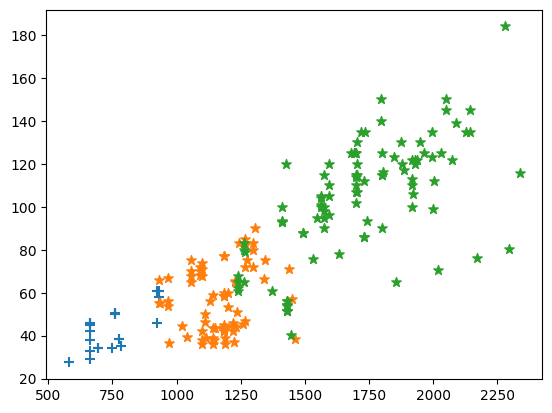

In [ ]:
visualizer("Thanisandra")

In [ ]:
df7.to_csv("../data/processed/processed_data.csv",index=False)